<a href="https://colab.research.google.com/github/positmin/20220113/blob/main/00_1_word_embedding_basic_20221024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## 20221024 10:10

In [1]:
from tensorflow.keras.datasets import cifar10 # cifar 100까지 있음
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [2]:
## 10:42
IMG_CHANNELS = 3 # 컬러사이즈 : parameter cnn은 채널 별로 filter를 적용 ## 채널 수만큼 파라미터가 늘어남
IMG_ROWS = 32 # 이미지 사이즈는 32x32
IMG_COLS = 32
BATCH_SIZE = 128
NB_EPOCH = 20
NB_CLASSES = 10
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = RMSprop()

In [3]:
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

170498071/170498071 [==============================] - 14s 0us/step
X_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [4]:
# 범주가 2개인 경우
# binary : target이 1개 예측
# categorical : 2개로 예측
# 신경망에서는 반드시 target은 one-hot-encoding 해줘야 한다
Y_train = to_categorical(Y_train, NB_CLASSES)
Y_test = to_categorical(Y_test, NB_CLASSES)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

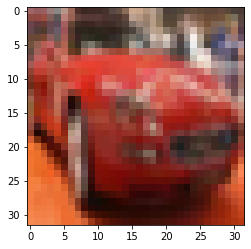

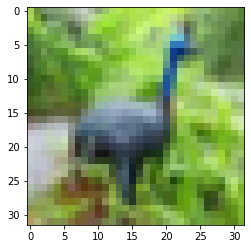

In [5]:
plt.imshow(X_train[5])
plt.grid(False)
plt.show()
plt.imshow(X_train[6])
plt.grid(False)
plt.show()

In [6]:
model = Sequential()
# 3이나 (3, 3)이나 동일
# same : 입력이나 출력이나 이미지 사이즈가 동일
model.add(Conv2D(32, (3, 3), padding='same', input_shape = (IMG_ROWS, IMG_COLS, IMG_CHANNELS))) 
# 배치사이즈 128 x IMG_ROWS  32 x 32 x 채널수 32
model.add(Activation('relu'))
# 사이즈가 행이나 열로 반으로 줄어듬
model.add(MaxPooling2D(pool_size=(2,2))) # 배치사이즈 128 x 16 x 16 x 32
model.add(Dropout(0.25)) # 사이즈에 영향을 미치지 않고, 회로의 계산 중에 25%를 생략해서 과적합을 방지 ## 10:50

model.add(Flatten()) # 128 x() 16 x 16 x 32 ) # 이미지 한 장의 특성
model.add(Dense(512)) # (16 x 16 x 32) x 512 => 128 x 512
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(NB_CLASSES)) # 512 x 10 => 128 x 10
model.add(Activation('softmax')) # 확률값으로 전환
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 512)               4194816   
                                                        

In [7]:
model.compile(loss='categorical_crossentropy', optimizer=OPTIM, metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE,
                    epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT, verbose=VERBOSE)

Epoch 1/20
313/313 [==============================] - 12s 9ms/step - loss: 1.7233 - accuracy: 0.3924 - val_loss: 1.5348 - val_accuracy: 0.4507
Epoch 2/20
313/313 [==============================] - 2s 8ms/step - loss: 1.3775 - accuracy: 0.5091 - val_loss: 1.3087 - val_accuracy: 0.5418
Epoch 3/20
313/313 [==============================] - 2s 8ms/step - loss: 1.2475 - accuracy: 0.5594 - val_loss: 1.3192 - val_accuracy: 0.5477
Epoch 4/20
313/313 [==============================] - 2s 8ms/step - loss: 1.1630 - accuracy: 0.5903 - val_loss: 1.1936 - val_accuracy: 0.5769
Epoch 5/20
313/313 [==============================] - 3s 8ms/step - loss: 1.0922 - accuracy: 0.6147 - val_loss: 1.0989 - val_accuracy: 0.6244
Epoch 6/20
313/313 [==============================] - 2s 8ms/step - loss: 1.0411 - accuracy: 0.6351 - val_loss: 1.1536 - val_accuracy: 0.6005
Epoch 7/20
313/313 [==============================] - 2s 8ms/step - loss: 0.9870 - accuracy: 0.6549 - val_loss: 1.0803 - val_accuracy: 0.6231
Epoch

In [8]:
score = model.evaluate(X_test, Y_test, batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest loss:", score[0]) ## 10:53
print("Test accuracy:", score[1])

79/79 [==============================] - 0s 4ms/step - loss: 1.1641 - accuracy: 0.6621

Test loss: 1.1641292572021484
Test accuracy: 0.6621000170707703


# OCR : 카카오 id password
# openAPI : 
  ### 키를 발급
  ### 데이터를 카카오 전송한 다음 결과를 리턴 받음
  ### 키는 REST API키로 전송
  ### 실행 순서
    - 이미지 리사이징
    - 이미지 detect
    - 이미지 recognization

In [9]:
import json
import cv2
import requests
import sys
LIMIT_PX = 1024
LIMIT_BYTE = 1024*1024 # 1MB
LIMIT_BOX = 40

In [10]:
## 11:10

# google OCR
  ### optical character recognition
  -30만원 정도
  - 사용자 키 생성
  - vision api를 위한 사용
  -client sdk를 이용해서 인증 후 사용
  # 지원하는 파일 형식
- jpeg, png8, gif
- 이미지 사이즈가 20m를 초과하면 안 됨 (길이 * 넓이)
- vision api 특징
 - FACE_DETECTION 1600 x 1200 눈 사이 거리가 가장 중요합니다
 - LANDMARK_DETECTION 640 x 480
 - LOGO_DETECTION 640 x 480
 - LABEL_DETECTION 640 x 480
 - TEXT_DETECTION 및 DOCUMENT_TEXT_DETECTION 1024, 768의 경우 문자 감지를 위해 해상도가 더 높아야 합니다. SAFE_SEARCH_DETECTION  640x480

In [11]:
def kakao_ocr_resize(image_path: str):
  image = cv2.imread('/content/drive/MyDrive/00_05_1_daejeon/data/2마트영수증.jpg')
  height, width, _ = image.shape
  if LIMIT_PX < height or LIMIT_PX < width:
    ratio = float(LIMIT_PX) / max(height,width)
    # openAPI 요구하는 사이즈로 변경
    image = cv2.resize(image, None, fx=ratio, fy=ratio)
    height, width, _ = height, width, _ = image.shape
    image_path= "{}_resized.jpg".format('2')
    cv2.imwrite(image_path, image)
    return image_path
  return None

In [12]:
# detection model은 모델을 확인하는 박스
#def kakao_ocr_detect(image_path: str, appkey: str):
#  API_URL = 'https://kapi.kakao.com/v1/vision/text/detect'
#  headers = {'Authorization' : 'KakaoAK {}'.format('c81bab6a9c9e6c8084452872acb239d5')}
#  image = cv2.imread('/content/drive/MyDrive/00_05_1_daejeon/data/2마트영수증.jpg')
#  jpeg_image = cv2.imencode(".jpg", image)[1]
#  data = jpeg_image.tobytes() # serialization해서 전송
  # 네트워크는 두개의 송수신선 (광통신(빛으로 전송 : 발광/수광 -> 한 선으로 전송))
  # post 방식으로 데이터 전송
#  return requests.post(API_URL, headers = headers, files={"file": data}, data={"boxes": json.dumps(boxes)})

In [13]:
# detection model은 이미지인지 문자인지를 구별하는 박스
#def kakao_ocr_recognize(image_path: str, boxes: list, appkey: str):
#  API_URL = 'https://kapi.kakao.com/v1/vision/text/recognize'
#  headers = {'Authorization': 'KakaoAK {}'.format('c81bab6a9c9e6c8084452872acb239d5')}
#  image = cv2.imread('/content/drive/MyDrive/00_05_1_daejeon/data/2마트영수증.jpg')
#  jpeg_image = cv2.imencode(".jpg", image)[1]
#  data = jpeg_image.tobytes() # serialization해서 전송
  # box 데이터 : detection 박스 : 문자 테두리 -> 문자를 인식(object detection - 해당 이미지에 박스를 쳐서 -> 박스 안에 있는 이미지를 인식)
#  return requests.post(API_URL, headers = headers, files={"file": data}, data={"boxes": json.dumps(boxes)})

In [14]:
def kakao_ocr(image_path: str, appkey: str):
  """
  OCR api request example
  :param image_path: 이미지파일 경로
  :param appkey: 카카오 앱 REST API 키
  """
  API_URL = 'https://dapi.kakao.com/v2/vision/text/ocr'
  headers = {'Authorization': 'KakaoAK {}'.format(appkey)}
  image = cv2.imread(image_path)
  jpeg_image = cv2.imencode(".jpg", image)[1]
  data = jpeg_image.tobytes()
  return requests.post(API_URL, headers=headers, files={"image": data})

In [15]:
def main():
  # if len(sys.argv) != 3:
  #   print("다시 실행하시오")
  image_path, appkey = '/content/drive/MyDrive/00_05_1_daejeon/data/2마트영수증.jpg', 'c81bab6a9c9e6c8084452872acb239d5'
  resize_impath = kakao_ocr_resize(image_path)
  if resize_impath is not None:
    image_path = resize_impath
    print("원본 대신 리사이즈된 이미지를 사용합니다.")
#  print(image_path)
#  output = kakao_ocr_detect(image_path, appkey).json()
#  print("[detect] output:\n{}\n".format(output))
#  boxes = output["result"]["boxes"]
#  boxes = boxes[:min(len(boxes), LIMIT_BOX)]
#  output = kakao_ocr_recognize(image_path, boxes, appkey).json()
  output = kakao_ocr(image_path, appkey).json() # REST API는 json 형태로 데이터를 송수신
#  print("[recognize] output:\n{}\n".format(json.dumps(output, sort_keys=True, indent=2)))
  return output

In [16]:
main() ## 12:10

{'result': [{'boxes': [[47, 18], [72, 18], [72, 45], [47, 45]],
   'recognition_words': ['흐']},
  {'boxes': [[141, 17], [188, 17], [188, 46], [141, 46]],
   'recognition_words': ['농협']},
  {'boxes': [[39, 52], [66, 51], [66, 63], [40, 65]],
   'recognition_words': ['경기']},
  {'boxes': [[72, 49], [124, 49], [124, 66], [72, 66]],
   'recognition_words': ['의정부시']},
  {'boxes': [[156, 64], [181, 64], [181, 78], [156, 78]],
   'recognition_words': ['전화']},
  {'boxes': [[186, 64], [207, 64], [207, 78], [186, 78]],
   'recognition_words': ['031']},
  {'boxes': [[124, 76], [158, 76], [158, 88], [124, 88]],
   'recognition_words': ['*****']},
  {'boxes': [[161, 87], [214, 86], [214, 99], [162, 101]],
   'recognition_words': ['nonghyue']},
  {'boxes': [[217, 90], [245, 89], [245, 99], [218, 101]],
   'recognition_words': ['com/']},
  {'boxes': [[9, 94], [49, 98], [48, 112], [7, 109]],
   'recognition_words': ['영수증']},
  {'boxes': [[53, 98], [105, 98], [105, 114], [53, 114]],
   'recognition_word

# 시계열 분석
### 12:22

In [17]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
numpy.random.seed(7)
dataframe = pandas.read_csv('/content/drive/MyDrive/00_05_1_daejeon/data/Passengers.csv', usecols=[1], engine='python', skipfooter=3) # uncols=[1]
dataset = dataframe.values
#dataset = dataset.astype('float32')
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

94 47


In [18]:
print(dataframe.head())
len(dataframe)

   Passengers
0         112
1         118
2         132
3         129
4         121


141

In [19]:
test.shape
test
# 자기 상관성 띄고 있는 데이터
# 독립변수와 종속변수가 순서대로 지정

array([[271],
       [306],
       [315],
       [301],
       [356],
       [348],
       [355],
       [422],
       [465],
       [467],
       [404],
       [347],
       [305],
       [336],
       [340],
       [318],
       [362],
       [348],
       [363],
       [435],
       [491],
       [505],
       [404],
       [359],
       [310],
       [337],
       [360],
       [342],
       [406],
       [396],
       [420],
       [472],
       [548],
       [559],
       [463],
       [407],
       [362],
       [405],
       [417],
       [391],
       [419],
       [461],
       [472],
       [535],
       [622],
       [606],
       [508]])

In [20]:
def create_dataset(dataset, look_back=1):
  dataX, dataY = [], [] # 독립변수, 종속변수
  for i in range(len(dataset)-look_back-1): # 종료시점
    # 범위로 하면 look_back 위치는 제외
    a = dataset[i:(i+look_back), 0] # 4개 # 앞의 3개는 종속 변수 없음 ## 12:38
    dataX.append(a)
    dataY.append(dataset[i + look_back, 0])
    ## 루프백이 있는 얘를 종속변수로 해주면 됨
  return numpy.array(dataX), numpy.array(dataY)

In [21]:
look_back = 2 # 독립변수의 개수
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
print(trainX[:3], trainY[:3])
#print(trainY)
train[:5]

[[112 118]
 [118 132]
 [132 129]] [132 129 121]


array([[112],
       [118],
       [132],
       [129],
       [121]])

In [22]:
## 12:46
# Train Score: 479.21 MSE (21.89 RMSE)
# Test Score: 1885.58 MSE (43.42 RMSE)
# 학습된 데이터는 99%까지 => 데이터가 있는 경우 + TM(뉴시), 이자율변동, 유동성 분석

model = Sequential()
model.add(Dense(8, input_dim=look_back, activation='relu')) # 2x8
model.add(Dense(1)) # 8x1 행렬
# 예측 : MSE loss function
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs = 200, batch_size=2, verbose=2)
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

Epoch 1/200
46/46 - 0s - loss: 105011.4141 - 441ms/epoch - 10ms/step
Epoch 2/200
46/46 - 0s - loss: 80183.0078 - 98ms/epoch - 2ms/step
Epoch 3/200
46/46 - 0s - loss: 59316.8750 - 94ms/epoch - 2ms/step
Epoch 4/200
46/46 - 0s - loss: 42018.9492 - 109ms/epoch - 2ms/step
Epoch 5/200
46/46 - 0s - loss: 28034.4062 - 102ms/epoch - 2ms/step
Epoch 6/200
46/46 - 0s - loss: 16985.4844 - 95ms/epoch - 2ms/step
Epoch 7/200
46/46 - 0s - loss: 9522.7119 - 94ms/epoch - 2ms/step
Epoch 8/200
46/46 - 0s - loss: 4831.9858 - 96ms/epoch - 2ms/step
Epoch 9/200
46/46 - 0s - loss: 2295.7117 - 100ms/epoch - 2ms/step
Epoch 10/200
46/46 - 0s - loss: 1185.2111 - 94ms/epoch - 2ms/step
Epoch 11/200
46/46 - 0s - loss: 766.4844 - 92ms/epoch - 2ms/step
Epoch 12/200
46/46 - 0s - loss: 630.3615 - 97ms/epoch - 2ms/step
Epoch 13/200
46/46 - 0s - loss: 584.4628 - 94ms/epoch - 2ms/step
Epoch 14/200
46/46 - 0s - loss: 568.7056 - 103ms/epoch - 2ms/step
Epoch 15/200
46/46 - 0s - loss: 568.5125 - 95ms/epoch - 2ms/step
Epoch 16/20

# one-hot-encoding
### 14:00

In [23]:
# 입력 텍스트 데이터 -> 숫자 임베딩 -> target 예측 -> 
char_arr = [c for c in 'SEPabcdefghijklmnopqrstuvwxyz단어나무게임벨트놀이자료']
# ['S', 'E', 'P', ............]
num_dic = {n: i for i, n in enumerate(char_arr)}
print(num_dic)
dic_len = len(num_dic)
print(dic_len) # 41자 : 100000 -> 100000개 짜리 벡터 (희소행렬)
seq_data = [['word', '단어'], ['wood', '나무'],
            ['game', '놀이'], ['girl', '소녀'],
            ['test', '연습'], ['love', '사랑']]

{'S': 0, 'E': 1, 'P': 2, 'a': 3, 'b': 4, 'c': 5, 'd': 6, 'e': 7, 'f': 8, 'g': 9, 'h': 10, 'i': 11, 'j': 12, 'k': 13, 'l': 14, 'm': 15, 'n': 16, 'o': 17, 'p': 18, 'q': 19, 'r': 20, 's': 21, 't': 22, 'u': 23, 'v': 24, 'w': 25, 'x': 26, 'y': 27, 'z': 28, '단': 29, '어': 30, '나': 31, '무': 32, '게': 33, '임': 34, '벨': 35, '트': 36, '놀': 37, '이': 38, '자': 39, '료': 40}
41


In [38]:
import tensorflow as tf
import numpy as np

char_arr = [c for c in "SEPabcdefghijklmnopqrstuvwxyz단어나무놀이소녀키스사랑봉구우루"]
num_dic = {n: i for i, n in enumerate(char_arr)}
dic_len = len(num_dic)

seq_data = [['word', "단어"], ["wood", "나무"], ["game", "놀이"], ["girl", "소녀"], 
            ["kiss", "키스"], ["love", "사랑"], ["bong", "봉구"], ["uruu", "우루"]]

In [39]:
# Embedding 함수 14:07
import numpy as np
def make_batch(seq_data): # seq 2 seq
  input_batch = [] # 입력 : h_state (전단계의 셀에서 출력된 결과)
  output_batch = [] # 번역입력
  target_batch = [] # 예측
  
  for seq in seq_data: # ['word', '단어']
    input = [num_dic[n] for n in seq[0]] # 'word' :  w:25으로 매핑시켜놓은거고 , o:17, r:20, d:6 => [25, 17, 20, 6]
    output = [num_dic[n] for n in ('S' + seq[1])] # 시작  # 단 : 29,  어 : 30 => 결과적으로 이렇게 만들어지죠 [0, 29, 30]
    target = [num_dic[n] for n in (seq[1] + 'E')] # [29, 30, 1] # 종료지점
    # one-hot-encoding
    ## 쭉 대각선으로 표시하게 되면 x를 표시하게 된다고 하면
    # 1, 0 0 0 0 0 0 0000000 : 41차 1차원벡터
    # 0,1,00000000000000000000
    # 0 0 1 00 00 0
    # 0 0 0 1 0 0 0 0 0
    input_batch.append(np.eye(dic_len)[input]) # 단위행렬을 만드는 함수 identity ## 14:15
    # [ 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 00000000] 이런 벡터가 하나 만들어지고
    # [ 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
    ## 전체 몇차원 벡터?
    # 4 x 41짜리 벡터가 행렬이 만들어지는거죠?
    ## 똑같은 원리로 
    output_batch.append(np.eye(dic_len)[output]) # 출력 행렬 3 x 41
    target_batch.append(target) # 종속변수 행렬이 3 x 41개로 만들어지겠죠
  return input_batch, output_batch, target_batch

In [40]:
def make_batch(seq_data):
    input_batch = []
    output_batch = []
    target_batch = []
    
    for seq in seq_data:
        input = [num_dic[n] for n in seq[0]]
        output = [num_dic[n] for n in ("S" + seq[1])]
        target = [num_dic[n] for n in (seq[1] + "E")]
        
        input_batch.append(np.eye(dic_len)[input])
        output_batch.append(np.eye(dic_len)[output])
        target_batch.append(target)
        
    return input_batch, output_batch, target_batch

In [41]:
import numpy as np

In [42]:
input_batch, output_batch, target_batch = make_batch(seq_data)

In [43]:
len(input_batch)

8

In [ ]:
## 14:26

In [44]:
# 시간 데이터 (자기상관성) => 독립변수 + 종속변수
from keras.preprocessing.sequence import TimeseriesGenerator
import numpy as np
data = np.array([[i] for i in range(50)]) # 0 ~ 49까지 [ [0], [1], [2], ... ] 이렇게 바꾸라는 것
targets = np.array([[i] for i in range(50)]) # 0 ~ 49까지 [ [0], [1], [2], ... ] 이렇게 바꾸라는 것
print(data[:10])
# 4개씩 (분기별로 종속성을 가지고 있는 경우)
data_gen = TimeseriesGenerator(data, targets,
                               length=10, sampling_rate=2,
                               batch_size=2)
assert len(data_gen) == 20
batch_0 = data_gen[0] # tuple 데이터이다.
print("데이터 구조 ", batch_0)
x, y = batch_0
# 검증에러 ## 에러를 검증하기 위해 쓰는 것 assert np.array
## 프로젝트 할 때는 주석 잡을 것
## 프로그램 만들 때는 없어야한다
assert np.array_equal(x,
                      np.array([[[0], [2], [4], [6], [8]],
                               [[1], [3], [5], [7], [9]]])) # 2 4 6 8 10, 3부터 시작하면 3 5 7 9 11
                               ## 괄호 개수 잘 파악
assert np.array_equal(y,
                      np.array([[10], [11]]))
print("마지막에 생성된 데이터")
data_gen[19] ## 19번째를 보게 되어지니까 array([[48],[49]])

[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]
데이터 구조  (array([[[0],
        [2],
        [4],
        [6],
        [8]],

       [[1],
        [3],
        [5],
        [7],
        [9]]]), array([[10],
       [11]]))
마지막에 생성된 데이터


(array([[[38],
         [40],
         [42],
         [44],
         [46]],
 
        [[39],
         [41],
         [43],
         [45],
         [47]]]), array([[48],
        [49]]))

# 순위

In [45]:
import re
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense
docs = ['Well done!', 'Good work', 'Great effort', 'nice work', 'Excellent!',
        'Weak', 'Poor effort!', 'not good', 'poor work', 'Could have done better.']

In [46]:
labels = [1, 1, 1, 1, 1, 0, 0, 0, 0, 0] # 긍정, 부정 분류하는 것
own_embedding_vocab_size = 10
# 10개로 구성된 벡터
# Well, done, good, work, great, effort, nice, excellent, weak, poor, not, could, have, better
# Great, nice, well [3, 7]. [1, 5] 번호가 부여가 되었죠 이게 원핫인코딩입니다
encoded_docs_oe = [one_hot(d, own_embedding_vocab_size) for d in docs]
print(encoded_docs_oe)
maxlen = 5
# cnn의 padding처럼 단어도 패딩 => 사이즈를 일치시키기 위해서 ( 텍스트는 사이즈 일치 : one-hot-encoding, word2vec, fasttext, glove)
padded_docs_oe = pad_sequences(encoded_docs_oe, maxlen=maxlen, padding='post')
print(padded_docs_oe)
model = Sequential()
model.add(Embedding(input_dim=own_embedding_vocab_size, # 10개로 구성된 단어
                    output_dim=32, # 단어 간의 유사성을 고려해서 임베딩 (유사성을 고려해주는 방식은 word2vec이죠?) => 벡터로 변환
                    input_length=maxlen)) # 길이 사이즈를 지정
model.add(Flatten())
model.add(Dense(1, activation='sigmoid')) #FFNN : 0.5를 기준으로 1.0으로 예측
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
print(model.summary())

[[5, 4], [7, 7], [1, 9], [6, 7], [6], [7], [1, 9], [5, 7], [1, 7], [7, 7, 4, 4]]
[[5 4 0 0 0]
 [7 7 0 0 0]
 [1 9 0 0 0]
 [6 7 0 0 0]
 [6 0 0 0 0]
 [7 0 0 0 0]
 [1 9 0 0 0]
 [5 7 0 0 0]
 [1 7 0 0 0]
 [7 7 4 4 0]]
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 5, 32)             320       
                                                                 
 flatten_1 (Flatten)         (None, 160)               0         
                                                                 
 dense_4 (Dense)             (None, 1)                 161       
                                                                 
Total params: 481
Trainable params: 481
Non-trainable params: 0
_________________________________________________________________
None


In [47]:
type(labels)

list

In [53]:
import tensorflow as tf
import numpy as np
labels = np.array(labels)
labels = labels.reshape((-1, 1))
#model.fit(tf.Tensor(padded_docs_oe), labels, epochs=50, verbose=0)
loss, accuracy = model.evaluate(padded_docs_oe, labels, verbose=0)
print('Accuracy: %0.3f' % accuracy)

Accuracy: 0.500


In [54]:
import numpy as np
np.random.seed(1337)

from tensorflow.keras.datasets import reuters
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
# 로이터는 신문 기사 -> 그룹별로 그룹핑 (경제, 사회, 문화, ...)
max_words = 1000
batch_size = 100
nb_epoch = 200
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=max_words, test_split=0.2) # 8:2로 분할

2110848/2110848 [==============================] - 0s 0us/step


In [55]:
type(X_train)
X_train.shape

(8982,)

In [56]:
nb_classes = np.max(y_train)+1 # 그룹번호를 지정할 때 0부터 시작해서 순서적으로 (가장 큰 라벨 번호 +1)
print(nb_classes) # 46개의 기사 그룹이 분류가 되있다는 소리죠 ## 15:26
tokenizer = Tokenizer(num_words=max_words) # 1000개의 단어로 구성
tokenizer

46


In [57]:
X_train = tokenizer.sequences_to_matrix(X_train, mode='binary') # one-hot-encoding
X_test = tokenizer.sequences_to_matrix(X_test, mode='binary')
# 신경망에서는 ㅡ종속변수는 반드시 one-hot-encoding 해주어야 함
Y_train = to_categorical(y_train, nb_classes)
Y_test = to_categorical(y_test, nb_classes)
print(Y_train.shape) # (8982, 46)
print(Y_train[:3])

(8982, 46)
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


# 기사 그룹
- 46개의 기사 그룹
- 로이터(reuters)에는 one-hot-encoding되어진 숫자로 이뤄진 데이터가 입력

In [58]:
X_train[0] # 가장 긴 기사 : 1000 one-hot-encoding의 의미
# 임금, 이자율, 경제성장률

array([0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1.,
       1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [59]:
# 현재 FFNN만을 이용해서 문서 분류를 실행함
model = Sequential()
model.add(Dense(512, input_shape=(max_words,), activation="relu")) #1000x512 가중치 사이즈
model.add(Dropout(0.5))
model.add(Dense(nb_classes, activation="softmax")) # 512 x 46
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, Y_train, epochs=nb_epoch, batch_size=batch_size, verbose =0, validation_split=0.1) ## verbose는 조용히 돌아가라(머신러닝)는 뜻
score = model.evaluate(X_test, Y_test, batch_size=batch_size, verbose=1)
print('\n\nModel accuracy %.2f%%' % (score[1]*100))
print("Model loss : %.2f%%" % (score[0]*100))

23/23 [==============================] - 0s 3ms/step - loss: 1.9314 - accuracy: 0.7867


Model accuracy 78.67%
Model loss : 193.14%


In [60]:
from tensorflow.keras.preprocessing.text import text_to_word_sequence
text = "해보지 않으면 해낼 수 없다"
result = text_to_word_sequence(text)
print("\n원문:\n", text)
print("\n토큰화:\n", result)


원문:
 해보지 않으면 해낼 수 없다

토큰화:
 ['해보지', '않으면', '해낼', '수', '없다']


In [61]:
docs = ["너무 재밌네요","최고예요","참 잘 만든 영화예요","추천하고 싶은 영화입니다","한번 더 보고싶네요","글쎄요","별로예요","생각보다 지루하네요","연기가 어색해요","재미없어요"]
classes = np.array([1,1,1,1,1,0,0,0,0,0]) ## array([1,1,1,1,1,0,0,0,0,0])

token = Tokenizer()
token.fit_on_texts(docs) # 미리학습
print(token.word_index)
x = token.texts_to_sequences(docs) # 
print("\n리뷰 텍스트, 토큰화 결과:\n", x)

{'너무': 1, '재밌네요': 2, '최고예요': 3, '참': 4, '잘': 5, '만든': 6, '영화예요': 7, '추천하고': 8, '싶은': 9, '영화입니다': 10, '한번': 11, '더': 12, '보고싶네요': 13, '글쎄요': 14, '별로예요': 15, '생각보다': 16, '지루하네요': 17, '연기가': 18, '어색해요': 19, '재미없어요': 20}

리뷰 텍스트, 토큰화 결과:
 [[1, 2], [3], [4, 5, 6, 7], [8, 9, 10], [11, 12, 13], [14], [15], [16, 17], [18, 19], [20]]


In [62]:
padded_x = pad_sequences(x, 4) # 동일 사이즈로 변환
print("\n 패딩 결과:\n", padded_x)
print("\n딥러닝 모델 시작:")
word_size = len(token.word_index) +1 # 전체 워드 사이즈
model = Sequential()
model.add(Embedding(word_size, 8, input_length=4)) # vectorizing함
# 임베딩 -> vector로 변환 -> 1차원으로 FFNN으로 입력
model.add(Flatten()) # 2차원 vector가 1차원 변환
model.add(Dense(1, activation='sigmoid')) # 예측
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(padded_x, classes, epochs=20)
print("\n Accuracy: %.4f" % (model.evaluate(padded_x, classes)[1]))


 패딩 결과:
 [[ 0  0  1  2]
 [ 0  0  0  3]
 [ 4  5  6  7]
 [ 0  8  9 10]
 [ 0 11 12 13]
 [ 0  0  0 14]
 [ 0  0  0 15]
 [ 0  0 16 17]
 [ 0  0 18 19]
 [ 0  0  0 20]]

딥러닝 모델 시작:
Epoch 1/20
1/1 [==============================] - 0s 439ms/step - loss: 0.6922 - accuracy: 0.5000
Epoch 2/20
1/1 [==============================] - 0s 17ms/step - loss: 0.6904 - accuracy: 0.5000
Epoch 3/20
1/1 [==============================] - 0s 11ms/step - loss: 0.6886 - accuracy: 0.5000
Epoch 4/20
1/1 [==============================] - 0s 8ms/step - loss: 0.6869 - accuracy: 0.5000
Epoch 5/20
1/1 [==============================] - 0s 10ms/step - loss: 0.6851 - accuracy: 0.6000
Epoch 6/20
1/1 [==============================] - 0s 8ms/step - loss: 0.6833 - accuracy: 0.6000
Epoch 7/20
1/1 [==============================] - 0s 10ms/step - loss: 0.6816 - accuracy: 0.6000
Epoch 8/20
1/1 [==============================] - 0s 9ms/step - loss: 0.6798 - accuracy: 0.6000
Epoch 9/20
1/1 [==============================] - 0s 

In [63]:
# RNN 이해 -> LSTM(long short term memory)을 사용
# - 기울기 vanishing(소실 문제가 해결)

In [64]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Embedding
model = Sequential()
model.add(Embedding(1000, 100))
model.add(LSTM(100, activation='tanh'))
model.add(Dense(46, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer = 'adam',
              metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=100, epochs=20, validation_data=(X_test, Y_test)) ## epochs=20

Epoch 1/20
90/90 [==============================] - 8s 62ms/step - loss: 2.5766 - accuracy: 0.3486 - val_loss: 2.4206 - val_accuracy: 0.3620
Epoch 2/20
90/90 [==============================] - 5s 55ms/step - loss: 2.4129 - accuracy: 0.3517 - val_loss: 2.4210 - val_accuracy: 0.3620
Epoch 3/20
90/90 [==============================] - 5s 55ms/step - loss: 2.4102 - accuracy: 0.3517 - val_loss: 2.4150 - val_accuracy: 0.3620
Epoch 4/20
90/90 [==============================] - 5s 57ms/step - loss: 2.4097 - accuracy: 0.3517 - val_loss: 2.4207 - val_accuracy: 0.3620
Epoch 5/20
90/90 [==============================] - 5s 59ms/step - loss: 2.4075 - accuracy: 0.3517 - val_loss: 2.4135 - val_accuracy: 0.3620
Epoch 6/20
90/90 [==============================] - 5s 57ms/step - loss: 2.3987 - accuracy: 0.3517 - val_loss: 2.4159 - val_accuracy: 0.3620
Epoch 7/20
90/90 [==============================] - 5s 59ms/step - loss: 2.3885 - accuracy: 0.3537 - val_loss: 2.3885 - val_accuracy: 0.3642
Epoch 8/20
90

71/71 [==============================] - 1s 15ms/step - loss: 2.1045 - accuracy: 0.4608

 Test Accuracy: 0.4608


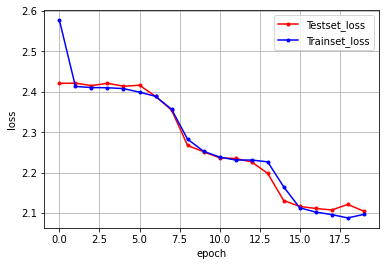

In [65]:
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label="Testset_loss")
plt.plot(x_len, y_loss, marker='.', c="blue", label="Trainset_loss")
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

# LSTM 16:00
- IMDB (internet moview Database) : 25000개의 리뷰 학습
- 영화관련정보, 출연진 정보, 개봉정보, 영화 후기, 평점
- 긍정 부정 분류
- convolution -> Conv1D(텍스트), Conv2D(이미지), Conv3D(영화)

In [66]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Conv1D, MaxPooling1D
from tensorflow.keras.preprocessing import sequence
import numpy
import tensorflow as tf
import matplotlib.pyplot as plt

In [67]:
seed = 0
numpy.random.seed(seed)
tf.random.set_seed(3)
# 1개의 영화평이 5000이상 안 됨
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=5000)
x_train = sequence.pad_sequences(x_train, maxlen=100) # 100개의 단어로
x_test = sequence.pad_sequences(x_test, maxlen=100)

17464789/17464789 [==============================] - 0s 0us/step


In [68]:
# 문장 -> vectorizing -> document vector -> 
x_train[0]

array([1415,   33,    6,   22,   12,  215,   28,   77,   52,    5,   14,
        407,   16,   82,    2,    8,    4,  107,  117,    2,   15,  256,
          4,    2,    7, 3766,    5,  723,   36,   71,   43,  530,  476,
         26,  400,  317,   46,    7,    4,    2, 1029,   13,  104,   88,
          4,  381,   15,  297,   98,   32, 2071,   56,   26,  141,    6,
        194,    2,   18,    4,  226,   22,   21,  134,  476,   26,  480,
          5,  144,   30,    2,   18,   51,   36,   28,  224,   92,   25,
        104,    4,  226,   65,   16,   38, 1334,   88,   12,   16,  283,
          5,   16, 4472,  113,  103,   32,   15,   16,    2,   19,  178,
         32], dtype=int32)

In [69]:
model = Sequential()
model.add(Embedding(5000, 100)) # 100개의 벡터로 표현
model.add(Dropout(0, 5)) # 과적합 줄이기 위해 계산 생략
# 채널수 -> 특징을 몇 번 잡는가?
# 주변의 5개를 보고 적분으로 특징을 잡아낸다.
# 나는 학교에 옆집 친구하고 아침 7시에 출발해서 8시에 도착한다.
# 1, 2
# 9-5 + 1 => 5개의 특징을 잡아낸다.
# same => padding, valid는 패딩을 하지 않고 계산 사이즈대로 출력 => 5개가 출력된다 
## 16:38
model.add(Conv1D(64, 5, padding='valid', activation='relu', strides=1))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(55)) # 55개의 사이즈로 출력
model.add(Dense(1)) # 55 X 1개로 예측을 함
model.add(Activation('sigmoid')) ## sigmoid니까 # 0.5를 기준으로 TRUE/FALSE ## 16:40
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 100)         500000    
                                                                 
 dropout_3 (Dropout)         (None, None, 100)         0         
                                                                 
 conv1d (Conv1D)             (None, None, 64)          32064     
                                                                 
 max_pooling1d (MaxPooling1D  (None, None, 64)         0         
 )                                                               
                                                                 
 lstm_1 (LSTM)               (None, 55)                26400     
                                                                 
 dense_9 (Dense)             (None, 1)                 56        
                                                      

In [72]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#history = model.fit(x_train, y_train, batch_size=100, epochs=5, 
#                    validation_data=(x_test, y_test))
print("\n Test Accuracy: %.4f" % (model.evaluate(x_test, y_test)[1]))

782/782 [==============================] - 3s 3ms/step - loss: 0.6933 - accuracy: 0.4910

 Test Accuracy: 0.4910


In [71]:
##17:00
print(type(x_train))
print(x_train.shape)
print(x_train[20001])
print(type(x_train[20000]))
print(y_train[1])
# 단어에 대한 인덱싱
dictionary=imdb.get_word_index(path='imdb_word_index.json') # 키이 : 데이터
print(type(dictionary)) # dictionary형태
print(len(dictionary)) # 88584개의 단어로 구성
imdb_key=dictionary.keys()
print(type(imdb_key))

print(list(imdb_key)[10]) # tsukino 단어 출력
list(imdb_key)[1]
keytotal=list(imdb_key)
sentance = []
for x, num in enumerate(x_train[10]):
  res = keytotal[x]
  sentance.append(res)
print(sentance)

<class 'numpy.ndarray'>
(25000, 100)
[  87   51  575   36   26  502    8   79  101  156    5 1507   36  181
    4  118    7   68   58   21  820  910 1030    8    2  183   56   11
 2716    7   68    2 4697   10   10  910   70 4146    4  118  927    4
  118 1180    5  907   21  131   36    2  183   56   14   20    9  595
    4  619  155    9   15   13 1781  910   11   68    2  127   24   60
  124   54    6   20    9   52   42   78   10   10   12    9   64  688
    8    4  676    7    4  156   15   13   70   60  202   12    6  342
    7  158]
<class 'numpy.ndarray'>
0
1641221/1641221 [==============================] - 0s 0us/step
<class 'dict'>
88584
<class 'dict_keys'>
hold's
['fawn', 'tsukino', 'nunnery', 'sonja', 'vani', 'woods', 'spiders', 'hanging', 'woody', 'trawling', "hold's", 'comically', 'localized', 'disobeying', "'royale", "harpo's", 'canet', 'aileen', 'acurately', "diplomat's", 'rickman', 'arranged', 'rumbustious', 'familiarness', "spider'", 'hahahah', "wood'", 'transvestism'